<a href="https://colab.research.google.com/github/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto previsão de internações por COVID19 - Hospital Sírio Libanês

#Contexto: Pandemia e ações necessárias
---
Em 2020 o mundo foi surpreendido por uma nova pandemia. A COVID19 em pouco tempo mudou a vida de todos no mundo todo. Pessoas e empresas precisaram se mobilizar para encarar todas as mudanças e restrições que o combate à pandemia nos impôs.

Muitos mercados sofreram economicamente, vidas foram perdidas (e ainda são, no momento da escrita desse projeto), empresas faliram, massas perderam seus empregos ou sofreram financeiramente de alguma forma. Diante do caos causado pelo medo e insegurança desta nova doença, as ciências médicas foram postas à prova. Todo o mundo esperava ansiosamente por uma solução que viesse dos médicos, laboratórios farmacêuticos e demais cientistas.

O desenvolvimento de uma vacina, uma cura, tratamentos eficazes que levasse a zero a letalidade desta nova doença. Diante de tanta expectativa, hospitais como o Sírio Libanês investiram muito em pesquisas para encontrar formas mais eficazes de atender a população e oferecer o melhor tratamento possível.

Dado este contexto, neste projeto trataremos de uma ação do Hospital Sírio Libanês. O hospital propôs ao público o desafio de desenvolver um modelo de Machine Learning que pudesse prever possibilidade de internação a partir de dados de diagnósticos de pacientes. Esta ação foi proposta na plataforma voltada à comunidade de Data Science, Kaggle, no link abaixo:

https://www.kaggle.com/S%C3%ADrio-Libanes/covid19

#O problema: previsão de internações
---
Um fato percebido logo no início da pandemia e da explosão de casos mundialmente foi que a infecção pelo coronavírus levava muitas pessoas a necessitarem de atendimento em UTI, principalmente pela necessidade de respiradores mecânicos, já que a doença comumente levava a um comprometimento da capacidade pulmonar de seus portadores.

Com o compartilhamento de informações e conhecimento sobre a evolução da doença em outros países, um dos maiores perigos que assombrava qualquer governo e população era a possibilidade de sobrecarregar o sistema de saúde, com a alta demanda de leitos de UTI diante da perda de controle da curva de contágio pela doença. Este risco foi a principal justificativa por trás das medidas restritivas à circulação e aglomeração de pessoas adotadas no mundo inteiro.


|![Curva de casos COVID](https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/images/curva_casos.jpg?raw=true)|
|:--:|
|<b>Simulações iniciais das curvas de casos de COVID comparando uma situação com contágio controlado e outra sem controle da curva de contágio</b>|

O risco de colapso nos sistemas de saúde exigiu mais do que nunca respostas rápidas dos profissionais de saúde. Como a demanda por UTIs corria o risco de chegar no limite, qualquer decisão envolvendo um leito de UTI é crítica. Neste cenário que a equipe do Sírio Libanês propõe o desafio citado anteriormente à comunidade de cientistas de dados no Kaggle: a partir de dados clínicos de pacientes que deram entrada no hospital, prever quem deve ser enviado à UTI ou não.

# Desafio Proposto
---
A partir de um conjunto de dados de pacientes que ingressaram no hospital com suspeita de COVID19, prever a necessidade de internação ou não de tal paciente. Os dados para cada paciente são dos tipos demográficos, histórico de doenças prévias, resultados de exame de sangue e sinais vitais.

Os dados oferecidos serão detalhados no próximo tópico.

**Diante do desafio, o objetivo deste projeto é, após a devida exploração dos dados oferecidos, treinar um modelo capaz de prever com a maior precisão possível a internação dos pacientes que ingressam no hospital com suspeita de COVID19.**


#Dados disponíveis
---
Os dados presentes no dataset contém registros anonimizados de pacientes que deram entrada nas unidades São Paulo e Brasília do Hospital Sírio-Libanês.

Os dados já passaram por uma limpeza inicial e normalização pela equipe do Hospital, apresentando valores de -1 a 1, nos campos que permitem normalização deste tipo.

##Estrutura do Dataset:
São 1925 registros, com 231 colunas.

 PACIENT_VISIT_IDENTIFIER | ... | WINDOW | ICU
---------------|----------|:-:|-:
 1 | ...| 0-2| 0
 1 | ...| 2-4| 1
 2 | ...| 0-2| 1
 3 | ...| 0-2| 0
...| ...|... |...
384|... | 4-6| 0

Cada registro representa uma janela de permanência de determinado paciente (sendo cada paciente único identificado pelo campo PATIENT_VISIT_IDENTIFIER), sendo 5 janelas possíveis (informadas no campo WINDOW):

| WINDOW | Período contido na janela |
|---------------|:----------:|
 | 0-2 | de 0 a 2 horas após a entrada|
 | 2-4 | de 2 a 4 horas após a entrada|
|  4-6 | de 4 a 6 horas após a entrada|
|  6-12 | de 6 a 12 horas após a entrada|
| Above_12 | acima de 12 horas após a entrada|

|![Janelas de permanência do paciente](https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/images/windows.jpg?raw=true)|
|:--:|
|<b>Ilustração das janelas de permanência do paciente e o descarte dos dados de janelas pós internação. Fonte: Sírio-Líbanes - kaggle.com</b>|

---
As 231 colunas correspondem a 54 características diferentes. Porém, algumas características possuem outras colunas associadas contendo dados como variação deste indicador, máximo registrado no período da janela, mínimo registrado no perído, média, mediana e diferença relativa. 

Estas 54 características/features estão separadas em 4 subgrupos principais:
- Dados demográficos do paciente (3): ID, faixa etária e gênero;
- Doenças prévias detectadas (9): são 7 grupos de doenças anonimizados, pressão alta e imunocomprometimento;
- Resultados de exames de sangue (36): albuminas, por exemplo;
- Sinais vitais (6): frequência cardíaca, por exemplo;

O arquivo contendo os dados utilizados neste projeto se encontra no repositório deste projeto no Github (https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true)

#Importando Bibliotecas

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.filterwarnings('ignore')


#Tratamento dos dados

In [93]:
dados = pd.read_excel("https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")

In [94]:
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,...,-0.994912,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,-0.863874,-0.863874,-0.863874,-0.863874,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.414634,-0.414634,-0.414634,-0.414634,-1.0,-0.979069,-0.979069,...,-0.996762,-1.0,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389967,0.407558,

In [95]:
print(dados.info())
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB
None


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,821.000000,821.0,821.000000,821.000000,821.000000,...,821.000000,821.000000,821.0,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,0.158333,0.809896,0.528527,0.528527,0.528527,0.528527,-1.0,-0.963433,-0.963433,-0.963433,-0.963433,-1.0,-0.931121,-0.931121,-0.931121,-0.931121,-1.0,-0.310924,-0.310924,-0.310924,-0.310924,-1.0,-0.311845,-0.311845,-0.311845,-0.311845,-1.0,-0.945928,-0.945928,-0.945928,...,-0.954177,-0.954177,-1.0,-0.093631,-0.332600,-0.264701,-0.438754,0.066893,0.743077,-0.097790,-0.338468,-0.268632,-0.435121,0.063798,0.748588,-0.040855,-0.207812,-0.264999,-0.483129,0.326823,0.817565,-0.235001,-0.399582,-0.282029,-0.316753,0.014964,0.818593,-0.752454,-0.728053,-0.754100,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,0.365148,0.392485,0.224100,0.224100,0.224100,0.224100,0.0,0.160870,0.160870,0.160870,0.160870,0.0,0.169509,0.169509,0.169509,0.169509,0.0,0.100256,0.100256,0.100256,0.100256,0.0,0.118812,0.118812,0.118812,0.118812,0.0,0.076610,0.076610,0.076610,...,0.123582,0.123582,0.0,0.252064,0.274102,0.246760,0.217113,0.242858,0.132635,0.257733,0.277952,0.252709,0.225554,0.249208,0.125994,0.281304,0.277802,0.272725,0.278239,0.216198,0.283453,0.271123,0.287580,0.296247,0.402675,0.276163,0.141316,0.364001,0.408677,0.366349,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000

##Funções para preparação dos dados

Abaixo são definidas funções contendo etapas de preparação dos dados que serão úteis para uso futuro no treino de modelos de machine learning. 

Os processos realizados pelas funções serão explicados com mais detalhes nas células adiante.

In [96]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [97]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

##Limpeza dos dados
---
Abaixo, com o auxílio das funções definidas nas células acima, são realizadas algumas etapas para limpeza dos dados iniciais que garantirão uma melhor normalização dos dados para posterior uso como dados de treino de um modelo de Machine Learning:

- **Preenchimento de campos vazios com dados próximos existentes para as features contínuas**
  - Para um treino adequado de um modelo de ML, é importante que não haja dados distorcidos no meio do dataset. Uma distorção que pode ocorrer é a existência de campos vazios. Em alguns casos esses dados nulos podem não ser bem interpretados no treino do modelo. Preencher campos numéricos com 0 nem sempre é a melhor opção, pois dependendo da natureza da feature, o valor zero ocupando um registro antes vazio entre valores positivos ou negativos já preenchidos anteriormente pode levar a um entendimento incorreto do cenário que esses dados em conjunto venham a mostrar.
  - Diante disso, a estratégia aqui adotada é a de **replicar nos campos vazios das features contínuas os dados já presentes nos registros próximos da mesma coluna**. A atenção especial com as features contínuas nesse caso se deve ao fato delas representarem no nosso dataset o intervalo de dados que representam resultados de exames e sinais vitais, podendo ser substituidas pelo valor coletado na janela seguinte ou anterior. 
  - Um cuidado importante nesta estratégia é evitar replicar dados de contextos completamente diferentes para preencher um dado vazio. Para evitar isso, primeiro agrupamos os registros pelo identificador do paciente e depois aplicar a replicação de dados próximos para os campos vazios. Assim evitamos que a o dado de frequência cardíaca vazio de um paciente "A" seja preenchido com o dado coletado para o paciente "B", por exemplo.
  - Isto é possível usando o método `fillna` da biblioteca pandas após o agrupamento. Este método nos permite preencher campos vazios, entre outras formas, replicando o mesmo valor presente no registro seguinte na mesma coluna, ou replicar o valor do registro anterior.

- **Remoção dos registros dos pacientes que possuem marcação de encaminhamento para UTI já na primeira janela (0-2)**
  - Seguindo recomendação da própria equipe que preparou os dados iniciais e o desafio no Kaggle, dados que possam ter sido coletados após o encaminhamento do paciente para UTI não devem ser utilizados para treino. Pois o objetivo é prever pacientes que possivelmente irão para UTI considerando os dados coletados antes que o evento ingresso em UTI ocorra.
  
- **Eliminar linhas que ainda possuem dados vazios**
  - Se após as etapas anteriores algum registro de paciente ainda possuir campos vazios, esta linha será eliminada para evitar uma distorção na hora do treino.

- **Manter apenas os dados da primeira janela (0 - 2 horas) e marcar os registros que resultaram em encaminhamento à UTI.**
  - Como o objetivo é um modelo que seja capaz de prever o quanto antes o risco de internação de um paciente, o ideal é termos um modelo capaz de já enxergar esse risco nas primeiras horas.
  - Para o correto treino do modelo, o paciente que acabou sendo encaminhado à UTI será marcado como ICU=1 no dataset. E todo dataset se tratará apenas de registros da primeira janela dos pacientes.

- **Conversão da coluna AGE_PERCENTIL em dados categóricos**
  - A coluna AGE_PERCENTIL apresenta uma informação que pode ser relevante e interessante para ser mantida nos dados de treino: a faixa etária do paciente. O problema é que os dados desta coluna são apresentados como texto ("60th","80th", etc), e dados textuais não conseguem ser usados como features em modelos de regressão, por exemplo. Para isso transformamos as categorias de faixas etárias apresentadas em texto para categorias numéricas usando o método `astype('category')` do pandas.

In [98]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)

age_cat = dados_limpos.AGE_PERCENTIL.astype('category')
dict_ages = dict(enumerate(age_cat.cat.categories))

dados_limpos.AGE_PERCENTIL = age_cat.cat.codes

In [99]:
dados_limpos['PATIENT_VISIT_IDENTIFIER'].unique().shape

(352,)

##Correlação das features

---
Em estatística, quando observamos conjuntos de dados separados por colunas, correlação é o termo usado para indicar o grau de semelhança na variância entre as colunas dos dados ao longo da amostra.

Em geral, a correlação entre duas colunas é apresentada através de um valor escalar no intervalo de -1 a 1. 

Sendo 1 a indicação de correlação positiva perfeita, ou seja, as duas variáveis comparadas variam proporcionalmente dentro do conjunto de dados estudado, de forma que o valor de uma pode ser inferido pelo valor da outra em uma função linear. 

Já o valor -1 atesta uma correlação inversa perfeita entre as duas variáveis comparadas, ou seja, assim como no caso anterior, há uma relação forte entre as duas variáveis de forma que uma pode ser obtida em função da outra, porém as duas variam em sentidos opostos.

Vale frisar que correlação não implica em causalidade. Duas variáveis podem ser perfeitamente correlatas, mas não afetam umas às outras necessariamente.

Abaixo podemos ver uma amostra da correlação entre as colunas presentes no nosso dataset. A correlação entre a coluna A e B é a mesma que entre B e A, portanto a matriz apresentada é espelhada em sua diagonal principal.

O valor de correlação está contido no intervalo de -1 a 1, e a relação apresentada é entre as features do índice da linha e da coluna do valor observado.

In [100]:
dados_limpos.corr()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,1.000000,-0.017361,0.031159,0.071961,0.058683,0.022828,0.045907,-0.026074,-0.005678,0.021964,0.024226,0.010275,-0.023086,-0.016204,-0.016204,-0.016204,-0.016204,NaN,0.060057,0.060057,0.060057,0.060057,NaN,0.012442,0.012442,0.012442,0.012442,NaN,0.062804,0.062804,0.062804,0.062804,NaN,0.029109,0.029109,0.029109,0.029109,NaN,0.018022,0.018022,...,-0.047713,-0.047713,NaN,0.095052,0.074880,0.076525,0.021779,-0.011847,-0.023686,0.093877,0.069839,0.077927,0.002525,-0.014158,-0.024354,0.096918,0.096265,0.081255,0.043287,0.000536,-0.014310,0.077751,0.057881,0.063673,0.015626,-0.020210,-0.024753,-0.040615,-0.082139,-0.038959,-0.046410,-0.045353,-0.018859,-0.051978,-0.080779,-0.059587,-0.030755,-0.045456,-0.015996,-0.041382
AGE_ABOVE65,-0.017361,1.000000,0.874773,0.031830,0.280326,0.051308,0.165905,0.032608,0.314536,0.003930,0.330744,0.169178,0.137186,-0.111907,-0.111907,-0.111907,-0.111907,NaN,0.069056,0.069056,0.069056,0.069056,NaN,0.097612,0.097612,0.097612,0.097612,NaN,0.018202,0.018202,0.018202,0.018202,NaN,0.054441,0.054441,0.054441,0.054441,NaN,0.021730,0.021730,...,0.071340,0.071340,NaN,-0.146802,0.222891,-0.223129,0.104568,-0.086413,-0.109800,-0.148504,0.220684,-0.207480,0.100707,-0.083182,-0.101247,-0.125120,0.221515,-0.232097,0.101549,-0.093789,-0.100968,-0.138507,0.210206,-0.222678,0.092669,-0.076399,-0.119952,-0.012655,-0.026278,0.012440,-0.005558,0.028262,-0.030515,0.009262,-0.039387,0.002790,-0.021190,0.029317,-0.031404,0.291010
AGE_PERCENTIL,0.031159,0.874773,1.000000,0.056211,0.294671,0.058015,0.134016,0.014480,0.334920,-0.035015,0.324703,0.201001,0.146246,-0.136709,-0.136709,-0.136709,-0.136709,NaN,0.046929,0.046929,0.046929,0.046929,NaN,0.147365,0.147365,0.147365,0.147365,NaN,0.000752,0.000752,0.000752,0.000752,NaN,0.031365,0.031365,0.031365,0.031365,NaN,0.015729,0.015729,...,0.063952,0.063952,NaN,-0.140119,0.269342,-0.201195,0.186620,-0.057003,-0.126255,-0.147229,0.265043,-0.186933,0.182667,-0.055100,-0.120971,-0.115272,0.272013,-0.204079,0.182024,-0.055767,-0.111780,-0.129059,0.249877,-0.208085,0.167176,-0.055859,-0.136280,-0.014140,-0.049698,-0.018826,-0.007992,-0.006030,-0.040314,0.013580,-0.062474,-0.037260,-0.040807,-0.004185,-0.039724,0.351071
GENDER,0.071961,0.031830,0.056211,1.000000,0.036528,-0.001784,-0.064757,-0.069768,-0.019812,-0.020573,-0.013136,-0.026982,0.054201,-0.089776,-0.089776,-0.089776,-0.089776,NaN,-0.018091,-0.018091,-0.018091,-0.018091,NaN,0.018961,0.018961,0.018961,0.018961,NaN,0.039055,0.0390

##Análise da correlação dos dados
---
Ao analisar os dados para treino de um modelo de Machine Learning o estudo da correlação entre variáveis é uma fonte de informações preciosas sobre o dataset em análise. A identificação de colunas altamente correlacionadas pode sugerir a existência de features desnecessárias no dataset, pois algumas colunas já trazem dados que se comportam e variam de forma semelhante que outras. 

Para os nossos dados já foi apresentado anteriormente a matriz numérica, apresentando os valores de -1 a 1 das correlações.

Mas há situações onde os dados analisados são compostos por dezenas ou centenas de colunas. O que é nosso caso. Em uma situação como essa é inviável observar a matriz de correlação numérica. Para facilitar essa observação, podemos plotar um gráfico do tipo heatmap onde os valores de correlação são inferidos a partir de uma escala de cores, o que é muito mais fácil para destacar valores extremos em meio a centenas de pontos.

O gráfico de heatmap para nossos dados segue abaixo.

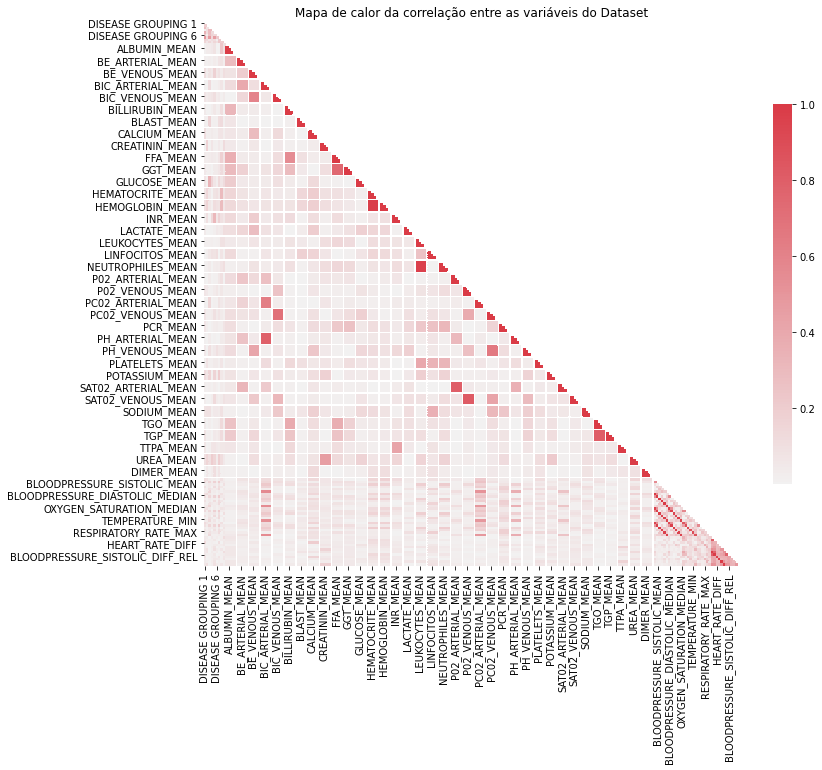

In [101]:
corr = dados_limpos.iloc[:,4:-2].corr().abs()
np.triu(np.ones(corr.shape), k=1).astype(np.bool)
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
ax.set_title('Mapa de calor da correlação entre as variáveis do Dataset')
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, cbar_kws={"shrink": .7})

No gráfico acima observamos um tom de vermelho mais forte indicando uma correlação mais alta em nossa escala entre  as duas variáveis que se encontram no ponto.

Como dito antes, dados altamente correlacionados podem levar a uma redundância no dataset utilizado para treino. A fim de evitar essas ocorrências, é importante removê-las.

##Remoção de features/colunas altamente correlacionadas

Para definir uma linha de corte entre o que é alta correlação e não é desejada em nossos dados, e o que não é e pode ser mantida na base, **determinamos o valor limite para correlação como 0.95 **(de um limite teórico de 1).

Abaixo transformaremos os dados de forma que quaisquer colunas que tenham um coeficiente de correlação maior que 0.95 sejam eliminados do dataset.

Porém, se adotarmos o processo descrito acima, não eliminaremos somente as possíveis "duplicatas", mas também os dados de referência aos quais comparávamos a segunda coluna para identificar a alta correlação. Ou seja, se uma coluna que apresenta dados de frequência cardíaca demonstra alta correlação com a coluna de pressão sanguínea, as duas tem alta correlação entre si, portanto sendo excluídas se apenas considerarmos as colunas que apresentarem correlação maior que 0.95. Mas essa abordagem elimina dados que podem ser importantes. O procedimento adequado é eliminar apenas uma das colunas, assim reduzindo a possível ambiguidade.


![Gráfico de correlação](https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/images/graf_corr.jpg?raw=true)

Na imagem acima fica mais claro o exemplo anterior. Quando verificamos um ponto na matriz que indique correlação maior que 0.95 (seta amarela), este ponto faz referência a duas features (setas vermelhas). Ao eliminarmos apenas uma das duas features, já estamos removendo a alta correlação do dataset.

Para realizar esta remoção, utilizaremos de uma função que percorre a matriz de correlação analisando seus valores, onde houver valor maior que 0.95 a feature referente à coluna da matriz será eliminada, dessa forma a feature representada pela linha da matriz onde o ponto se encontra é mantida. Dessa forma, quando duas features forem identificadas como altamente correlacionadas, apenas uma delas será eliminada do conjunto de dados.

In [102]:
def remove_corr_var(dados, valor_corte):
  alta_corr = valor_corte
  dados = dados.drop('WINDOW',1)
  matrix_corr = dados.iloc[:,4:-2].corr().abs()
  matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
  excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > alta_corr)]

  return dados.drop(excluir, axis=1), excluir

In [103]:
dados_limpos_sem_corr, colunas_excluidas = remove_corr_var(dados_limpos, 0.95)
print('Foram excluídas {0} colunas do dataset'.format(len(colunas_excluidas)))
print(colunas_excluidas)
dados_limpos_sem_corr

Foram excluídas 130 colunas do dataset
['ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'GGT_MEAN', 'GGT_MIN', 'GGT_MAX', 'GLUCOSE_MEAN', 'GLUCOSE_MIN', 'GLUCOSE_MAX', 'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN', 'HEMATOCRITE_MAX', 'HEMOGLOBIN_MEDIAN', 'HEMOGLOBIN_MEAN', 'HEMOGLOBIN_MIN', 'HEMOGLOBIN_MAX', 'INR_MEAN', 'INR_MIN', 'INR_MAX', 'LACTATE_MEAN', 'LACTATE_MIN', 'LACTATE_MAX', 'LEUKOCYTES_MEAN', 'LEUKOCYTES_MIN', 'LEUKOCYTES_MAX', 'LINFOCITOS_MEAN', 'LINFOCITOS_MIN', 'LINFOCITOS_MAX', 'NEUTROPHILES_MEDIAN', 'NEUTROPHILES_MEAN', 'NEUTROPHILES

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_DIFF,FFA_MEDIAN,FFA_DIFF,GGT_MEDIAN,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_DIFF,HEMOGLOBIN_DIFF,...,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_DIFF,TGO_MEDIAN,TGO_DIFF,TGP_MEDIAN,TGP_DIFF,TTPA_MEDIAN,TTPA_DIFF,UREA_MEDIAN,UREA_DIFF,DIMER_MEDIAN,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.183673,-1.0,-0.868365,-1.0,-0.742004,-1.0,-0.945093,-1.0,-0.891993,-1.0,0.090147,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.540721,-1.0,-0.518519,-1.0,0.939394,-1.0,0.345679,-1.0,-0.028571,-1.0,-0.997201,-1.0,-0.990854,-1.0,-0.825613,-1.0,-0.836145,-1.0,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.500000,-0.247863,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.912243,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.780261,-1.0,0.144654,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.399199,-1.0,-0.703704,-1.0,0.939394,-1.0,0.345679,-1.0,0.085714,-1.0,-0.995428,-1.0,-0.986662,-1.0,-0.846633,-1.0,-0.836145,-1.0,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.714286,-0.435897,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,-0.961262,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.972789,-1.0,-1.0,-1.0,0.326531,-1.0,-0.968861,-1.0,-0.194030,-1.0,-0.316589,-1.0,-0.891993,-1.0,-0.203354,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.564753,-1.0,-0.777778,-1.0,0.939394,-1.0,0.580247,-1.0,0.200000,-1.0,-0.989549,-1.0,-0.956555,-1.0,-0.846633,-1.0,-0.937349,-1.0,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.357143,-0.299145,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.935113,-1.0,-1.0,-1.0,0.357143,-1.0,-0.913659,-1.0,-0.829424,-1.0,-0.938084,-1.0,-0.851024,-1.0,0.358491,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.457944,-1.0,-0.592593,-1.0,0.939394,-1.0,0.345679,-1.0,0.142857,-1.0,-0.998507,-1.0,-0.991235,-1.0,-0.846633,-1.0,-0.903614,-1.0,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.571429,-0.076923,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,-0.980333,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.317073,-1.0,-0.317073,-1.0,-0.938950,-1.0,-1.0,-1.0,0.357143,-1.0,-0.891012,-1.0,-0.742004,-1.0,-0.958528,-1.0,-0.891993,-1.0,0.291405,-1.0,-1.0,...,-1.0,0.363636,-1.0,-0.292390,-1.0,-0.666667,-1.0,0.939394,-1.0,0.345679,-1.0,0.0

Observando os resultados acima, ao eliminar as ocorrências de correlação entre colunas maiores que 0.95 **foram eliminadas 131 de 231 colunas. Restam 100 colunas para seguirmos a análise**.

#Exploração dos dados após limpeza
---
Após a limpeza inicial e eliminação de features altamente correlacionadas, vamos observar algumas features mais livremente para vermos se conseguimos algum conhecimento maior na relação do problema com os nossos dados.

Abaixo estão listadas as features que possuem as correlações mais altas com a coluna 'ICU' em ordem decrescente.

Desta lista podemos tirar dicas de quais colunas podem ter maior influência na ocorrência de internação.

In [104]:
top_10_corr = dados_limpos_sem_corr.corr().abs()[-1:].T.sort_values('ICU', ascending=False)[1:11]
top_10_corr

,ICU
AGE_PERCENTIL,0.351071
PCR_MEDIAN,0.296455
AGE_ABOVE65,0.291010
UREA_MEDIAN,0.247612
SODIUM_MEDIAN,0.224532
CALCIUM_MEDIAN,0.224415
LACTATE_MEDIAN,0.207999
RESPIRATORY_RATE_MEAN,0.207911
BLOODPRESSURE_DIASTOLIC_MEAN,0.201210
HTN,0.180555


Entre estas features apenas AGE_PERCENTIL, AGE_ABOVE65 e HTN são dados categóricos, as restantes são dados contínuos.

Primeiramente vamos analisar essas duas features categóricas, pois podemos observar a ocorrência de internações em cada uma das suas finitas categorias.

Analisamos inicialmente a ocorrência de UTI nas faixas de idade descritas na feature AGE_PERCENTIL.

###Taxa de internação em UTI por faixas de idade

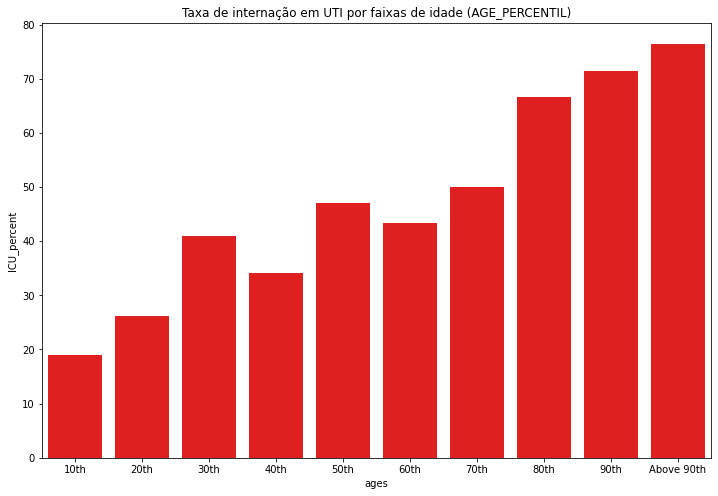

In [105]:
ICU_age_percentil = pd.DataFrame()
ICU_age_percentil['ICU_percent'] = dados_limpos_sem_corr[['AGE_PERCENTIL','ICU']].groupby('AGE_PERCENTIL').mean()['ICU']*100
ICU_age_percentil['ages'] = list(dict_ages.values())
ICU_age_percentil.set_index('ages',inplace=True)

plt.figure(figsize=(12,8))
plt.title('Taxa de internação em UTI por faixas de idade (AGE_PERCENTIL)')
sns.barplot(x=ICU_age_percentil.index,y='ICU_percent', data=ICU_age_percentil, color='red');

Função para condensar os passos para criação de gráficos categóricos binários:

In [106]:
def prepare_bin_hist(dados,feature, x_label, title, bin_cats=None):
  ICU_df = pd.DataFrame()
  ICU_df['ICU_percent (%)'] = dados[[feature,'ICU']].groupby(feature).mean()['ICU']*100
  ICU_df[x_label] = ['Não','Sim'] if bin_cats==None else bin_cats
  ICU_df.set_index(x_label,inplace=True)

  plt.title(title)
  sns.barplot(x=ICU_df.index,y='ICU_percent (%)', data=ICU_df);

def prepare_n_bin_hist(dados,features: list,shape: list, title):
  fig, axes = plt.subplots(shape[0],shape[1], figsize=(shape[1]*5,shape[0]*5))
  fig.suptitle(title, fontsize=18)
  
  i=0
  j=0
  for feature in features:
    ICU_df = pd.DataFrame()
    ICU_df['ICU_percent (%)'] = dados[[feature,'ICU']].groupby(feature).mean()['ICU']*100
    ICU_df[feature] = ['Não','Sim']
    ICU_df.set_index(feature,inplace=True)
    sns.barplot(ax=axes[i,j], x=ICU_df.index, y='ICU_percent (%)', data=ICU_df); 

    j = j + 1 if j < (shape[1] - 1) else  0
    i = i + 1 if j == 0 else  i
    
  if j == (shape[1] - 1):
    fig.delaxes(axes[i][shape[1]-1]) 

Observando os dados acima fica claro que há uma relação direta entre a ocorrência de internações e o aumento das faixas etárias. 

**Quanto maior a faixa de idade, maior a ocorrência de internações entre os dados da amostra.**

###Taxa de internação entre menores e maiores de 65 anos

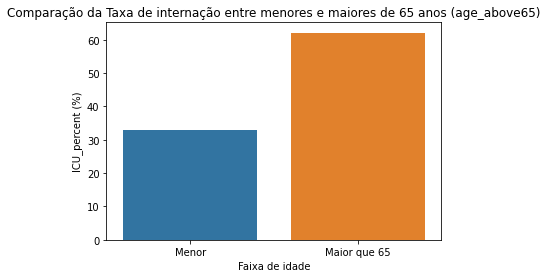

In [107]:
prepare_bin_hist(dados_limpos_sem_corr, 'AGE_ABOVE65', 'Faixa de idade', 
                 'Comparação da Taxa de internação entre menores e maiores de 65 anos (age_above65)', ['Menor','Maior que 65'])

Como visto na comparação das taxas de internação por faixa etária, **as internações são mais frequentes para pacientes maiores de 65 anos**.

###Relação de internação e hipertensão

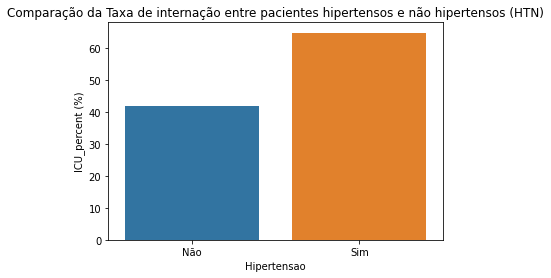

In [108]:
prepare_bin_hist(dados_limpos_sem_corr, 'HTN', 'Hipertensao', 
                 'Comparação da Taxa de internação entre pacientes hipertensos e não hipertensos (HTN)')

Mais uma vez um fator de risco amplamente divulgado se mostra relevante nas ocorrências de internações em nossos dados.

**Neste caso pacientes hipertensos tem aproximadamente 50% a mais de chances de serem internados que os demais**.

###Observação da ocorrência de internação nas demais features

Entre as 10 features com maior correlação com a ocorrência de internação (ICU), a PCR_MEDIAN se mostrou a variável contínua de maior relevância.

Abaixo observamos a distribuição dos diversos valores de PCR_MEDIAN entre os casos de internação ou não.

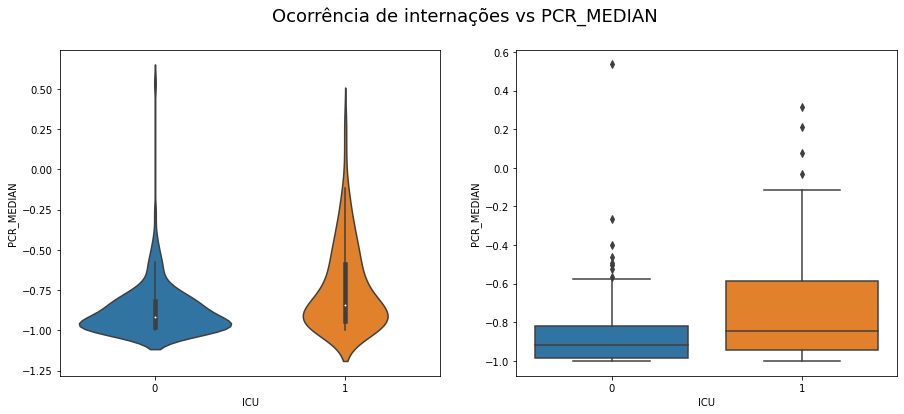

In [109]:
fig, axes = plt.subplots(1,2, figsize=(15,6))

fig.suptitle('Ocorrência de internações vs PCR_MEDIAN', fontsize=18)

sns.violinplot(ax=axes[0], data=dados_limpos_sem_corr,y = 'PCR_MEDIAN', x='ICU');
sns.boxplot(ax=axes[1],data=dados_limpos_sem_corr,y = 'PCR_MEDIAN', x='ICU');

Observando a olho nu, a relação entre PCR_MEDIAN e internação aparenta ser uma relação positiva, onde há mais casos de internação em pacientes que tiveram resultados de PCR_MEDIAN mais altos.

Obs.: Como o nome diz, a variável PCR_MEDIAN é a derivação de uma feature obtida em exames. No caso é a mediana dos índices de PCR (Proteína C Reativa) obtidas através de exames de sangue.

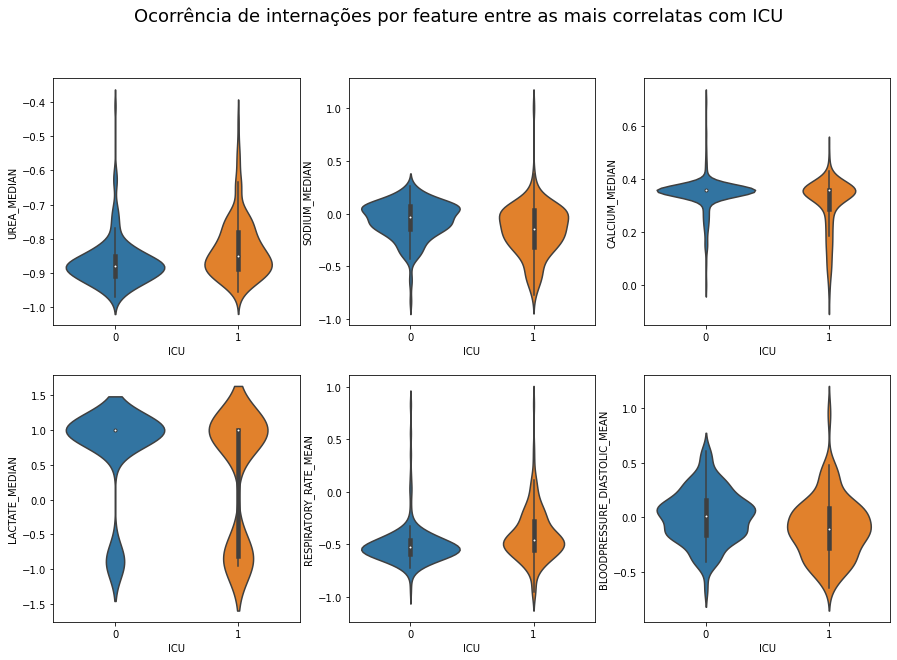

In [110]:
fig, axes = plt.subplots(2,3, figsize=(15,10))

fig.suptitle('Ocorrência de internações por feature entre as mais correlatas com ICU', fontsize=18)

sns.violinplot(ax=axes[0,0], data=dados_limpos_sem_corr,y = 'UREA_MEDIAN', x='ICU');
sns.violinplot(ax=axes[0,1], data=dados_limpos_sem_corr,y = 'SODIUM_MEDIAN', x='ICU');
sns.violinplot(ax=axes[0,2], data=dados_limpos_sem_corr,y = 'CALCIUM_MEDIAN', x='ICU');
sns.violinplot(ax=axes[1,0], data=dados_limpos_sem_corr,y = 'LACTATE_MEDIAN', x='ICU');
sns.violinplot(ax=axes[1,1], data=dados_limpos_sem_corr,y = 'RESPIRATORY_RATE_MEAN', x='ICU');
sns.violinplot(ax=axes[1,2], data=dados_limpos_sem_corr,y = 'BLOODPRESSURE_DIASTOLIC_MEAN', x='ICU');

Acima observamos as distribuições binárias para as demais 6 features que figuraram no nosso top 10 daquelas com maior correlação com a variável ICU.

A maioria delas se trata de índices obtidos em exames de sangue que para leigos não traz informação muito clara. Mas existe a **RESPIRATORY_RATE_MEAN** entre elas, relacionada à taxa de respiração do paciente, considerando apenas o nome. **Observando sua distribuição, podemos inferir que em pacientes que foram futuramente internados, é mais frequente o comportamento de uma maior taxa média de respiração que nos demais**.

### Explorando outras colunas de interesse
---
As colunas exploradas na seção acima foram selecionadas seguindo um critério de classificação por correlação com a coluna ICU.
Além delas, algumas colunas identificadas visualmente parecem interessantes de serem analisadas a fim de conhecer sua relação com o agravamento da doença ou não.

As escolhi diretamente do dataset resultante da limpeza. Para sua análise, vamos adotar um olhar por dois grupos: doenças pré-existentes e dados coletados em exames.

**Doenças pré-existentes:**

> IMMUNOCOMPROMISED, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6

São 7 colunas que correspondem, cada uma, a um determinado grupo de doenças não informadas. Todas são variáveis categóricas, o que nos permite comparar o percentual de ocorrência de internações entre pacientes que portam as doenças ou não.

**Dados coletados em exames:**

> SAT02_ARTERIAL_MEDIAN, OXYGEN_SATURATION_MEAN

Duas colunas com dados contínuos, os quais analisaremos suas distribuições entre pessoas internadas e não internadas.


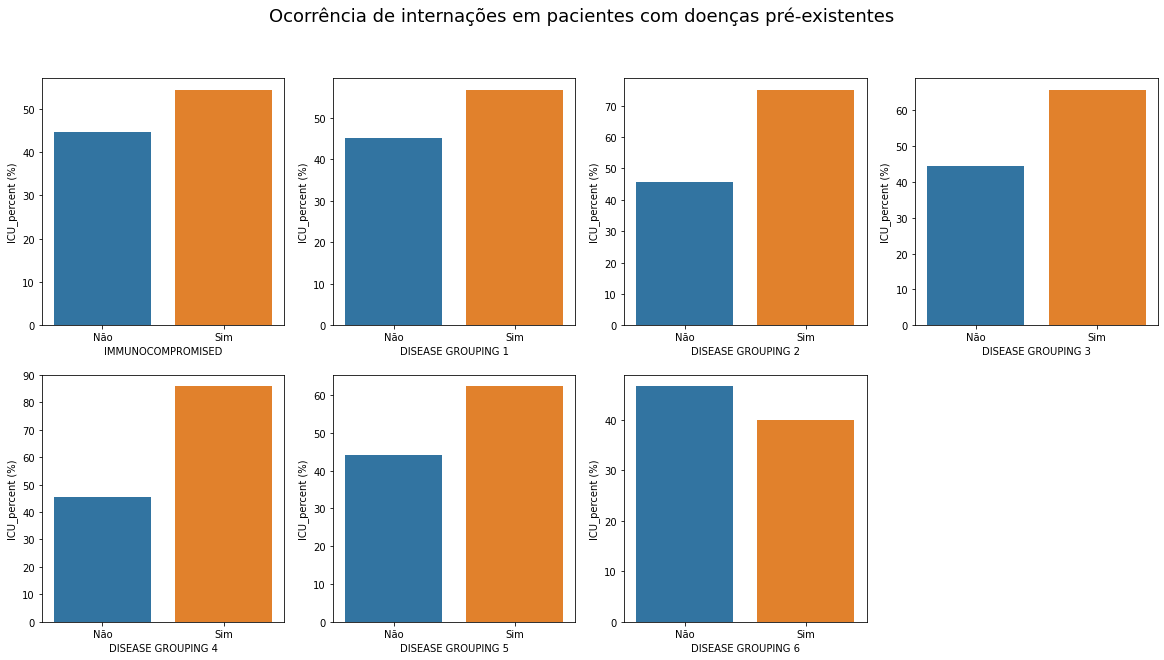

In [111]:
features = ['IMMUNOCOMPROMISED', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
            'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']
prepare_n_bin_hist(dados_limpos_sem_corr, features, [2,4], 'Ocorrência de internações em pacientes com doenças pré-existentes')

Acima vemos o percentual de internações nos pacientes com doenças pré-existentes, divididos para cada grupo de doenças no dataset.

Como esperado, para quase todas os grupos, é mais provável a internação de um paciente que porte doença pré-existente. A única exceção foi para o DISEASE GROUPING 6.bit_length

**O grupo de doenças que apresentou maior relação com casos de internação foi o DISEASE GROUPING 4, no qual um paciente que se enquadre neste perfil de doenças tem quase o dobro de chances de ser internado**.

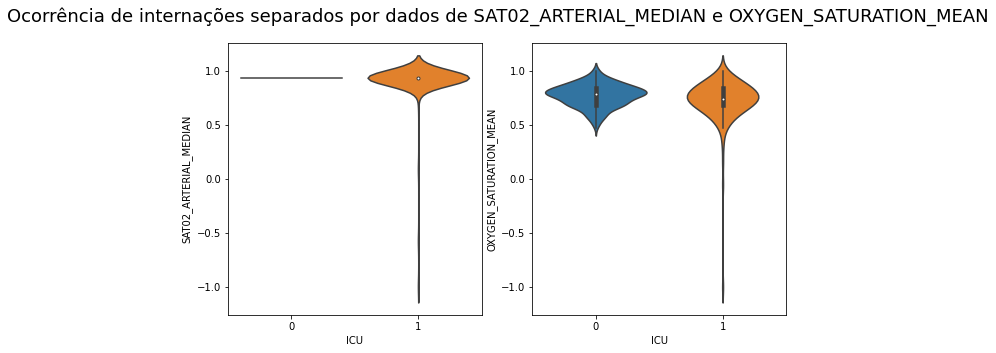

In [112]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

fig.suptitle('Ocorrência de internações separados por dados de SAT02_ARTERIAL_MEDIAN e OXYGEN_SATURATION_MEAN', fontsize=18)
sns.violinplot(ax=axes[0], data=dados_limpos_sem_corr,y = 'SAT02_ARTERIAL_MEDIAN', x='ICU');
sns.violinplot(ax=axes[1], data=dados_limpos_sem_corr,y = 'OXYGEN_SATURATION_MEAN', x='ICU');

**Quanto às observações de saturação, percebemos que pacientes que futuramente iriam a internação costumam apresentar valores mais baixos que a média dos demais pacientes**.

#Aplicando Machine Learning
---
Machine Learning ou aprendizado de máquina é um termo já muito falado hoje em dia. Em resumo, trata do uso de algoritmos computacionais que, expostos a conjuntos de dados durante seu "treino", são capazes de identificar padrões nos dados, adquirindo certa capacidade de reconhecer ou inferir esses padrões em outros dados futuramente sendo capaz de classificar-los ou prever tendências entre outras tarefas semelhantes úteis para seus usuários.

Existem várias abordagens para treinar um algoritmo a identificar padrões, estas diversas abordagens resultam em modelos de machine learning diferentes.

Inicialmente utilizamos o `DummyClassifier`, um tipo de modelo para simular uma classificação pelo método mais "ingênuo", por exemplo, entre os métodos utilizados, existe um que responde a todos os casos a classificação mais frequente encontrado nos dados de treino.

Antes de realizar qualquer treino de modelo, devemos separar nossos dados já rotulados em conjuntos para treino do modelo e outro para testes de acurácia do modelo treinado. Uma prática comum é separar os dados de teste e treino em uma proporção de 25% para teste e 75% para treino do modelo. Esta distribuição é utilizada por padrão pelo método `train_test_split` que utilizamos aqui. Os dados são separados de forma aleatória para reduzir chance de inviesamento do treino fazendo uma espécie de 'embaralhamento' dos dados. Mas aqui utilizamos o parâmetro `stratify=y` para indicar que os conjuntos separados devem manter uma mesma proporção entre casos de ICU=1 e ICU=0.

Após a separação dos dados, realizamos o treino do modelo com os dados separados e, enfim o teste, obtendo sua acurácia com o método `accuracy_score`. Em resumo, a **acurácia** é uma métrica de fácil entendimento e abrangente, pois representa o percentual de acerto na divisão da soma de acertos no `y_predict` sobre o total de registros de valor real `y_test`.

> **Seaparação dos dados -> Treino do modelo -> Teste -> Resultado: acurácia**

Todo o processo acima foi encapsulado na função `gera_score`, que utilizaremos para replicar os passos desde treino até obter acurácia para os 5 tipos de modelos iniciais:

> **DummyClassifier, LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, LinearSVC**

Todos são modelos supervisionados de classificação, mas com formulações diferentes no treino, sendo ideais para serem comparadas suas performances.

In [113]:
def gera_score(modelo, dados):
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER","ICU"], axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  modelo.fit(x_train, y_train)
  y_prediction = modelo.predict(x_test)
  
  print('Acurácia do modelo: ' + str(accuracy_score(y_test, y_prediction)))

In [114]:
np.random.seed(73246)
print('DummyClassifier')
gera_score(DummyClassifier(), dados_limpos_sem_corr)
print('----------------\nLogisticRegression')
gera_score(LogisticRegression(max_iter=500), dados_limpos_sem_corr)
print('----------------\nDecisionTreeClassifier')
gera_score(DecisionTreeClassifier(), dados_limpos_sem_corr)
print('----------------\nRandomForestClassifier')
gera_score(RandomForestClassifier(), dados_limpos_sem_corr)
print('----------------\nSVC')
gera_score(SVC(), dados_limpos_sem_corr)
print('----------------\nLinearSVC')
gera_score(LinearSVC(), dados_limpos_sem_corr)

DummyClassifier
Acurácia do modelo: 0.48863636363636365
----------------
LogisticRegression
Acurácia do modelo: 0.6136363636363636
----------------
DecisionTreeClassifier
Acurácia do modelo: 0.6363636363636364
----------------
RandomForestClassifier
Acurácia do modelo: 0.7954545454545454
----------------
SVC
Acurácia do modelo: 0.6477272727272727
----------------
LinearSVC
Acurácia do modelo: 0.6931818181818182


Nos primeiros testes, observamos que alguns modelos se destacam, outros nem tanto, mas há uma certa aleatoriedade a cada vez que a célula é executada.

Para reduzir esse efeito da aleatoriedade nos dados variando a acurácia resultante dos modelos, vamos tirar a média de vários treinos, assim utilizamos a lei dos grandes números para assegurar que os valores de acurácia convergirão para a média.

A realização de vários treinos e cálculo da média das acurácias ficará a cargo da função criada `gera_n_scores`.

In [115]:
def gera_n_scores(modelo, dados,n):
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER","ICU"], axis=1)

  acc_lista = []
  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
    modelo.fit(x_train, y_train)
    y_prediction = modelo.predict(x_test)
    acc_lista.append(accuracy_score(y_test, y_prediction))
  
  print('Acurácia média em {0} treinos do modelo {1}: '.format(n, type(modelo).__name__) + str(np.mean(acc_lista)))

In [116]:
np.random.seed(73246)
gera_n_scores(DummyClassifier(), dados_limpos_sem_corr,50)
gera_n_scores(LogisticRegression(max_iter=500), dados_limpos_sem_corr,50)
gera_n_scores(DecisionTreeClassifier(), dados_limpos_sem_corr,50)
gera_n_scores(RandomForestClassifier(), dados_limpos_sem_corr,50)
gera_n_scores(SVC(), dados_limpos_sem_corr,50)
gera_n_scores(LinearSVC(), dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo DummyClassifier: 0.5079545454545454
Acurácia média em 50 treinos do modelo LogisticRegression: 0.7168181818181819
Acurácia média em 50 treinos do modelo DecisionTreeClassifier: 0.6393181818181818
Acurácia média em 50 treinos do modelo RandomForestClassifier: 0.7254545454545455
Acurácia média em 50 treinos do modelo SVC: 0.6840909090909091
Acurácia média em 50 treinos do modelo LinearSVC: 0.7118181818181817


Com a acurácia média resultante de 50 treinos para cada modelo, os resultados convergiram mesmo diante da aleatoriedade na separação dos dados.

Os modelos que apresentaram melhor acurácia foram **RandomForestClassifier** e **LogisticRegression**, nesta ordem.

Além dos dois modelos acima que tiveram melhor performance, vamos testar outros três classificadores e avaliar sua performance:

> **GaussianNB** -> classificador probabilístico baseado no “Teorema de Bayes”

> **GradientBoostingClassifier** e **XGBClassifier** -> implementações de Gradient Boosting


In [117]:
gera_n_scores(GaussianNB(), dados_limpos_sem_corr,50)
gera_n_scores(GradientBoostingClassifier(), dados_limpos_sem_corr,50)
modelo_xgb = xgb.XGBClassifier(objective="binary:logistic", eval_metric="auc")
gera_n_scores(modelo_xgb, dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo GaussianNB: 0.5986363636363636
Acurácia média em 50 treinos do modelo GradientBoostingClassifier: 0.7252272727272728
Acurácia média em 50 treinos do modelo XGBClassifier: 0.7154545454545455


Dos três modelos avaliados, **os modelos de Gradient Boosting tiveram boa performance comparados aos nossos modelos anteriores**. Por isso serão levados adiante.

##Métricas
---

Os modelos de melhor performance na seção anterior foram:

- RandomForestClassifier
- LogisticRegression
- GradientBoostingClassifier
- XGBClassifier

Para avaliar com mais critérios a performance dos modelos podemos utilizar diversas métricas disponíveis nos pacotes de ML do python.

As métricas usadas serão as listadas abaixo:

- AUC

- f1_score

- recall

###AUC e curva ROC
---

A **Curva Característica de Operação do Receptor (Curva COR), ou, do inglês, Receiver Operating Characteristic Curve (ROC curve)**, ou, simplesmente, curva ROC, é uma curva muito utilizada para medir o desempenho de sistemas de classificação binários.

**A curva ROC é obtida pela representação da razão RPV = Positivos Verdadeiros / Positivos Totais versus a razão RPF = Positivos Falsos / Negativos Totais, para vários valores do limiar de classificação**. O RPV é também conhecido como sensibilidade (ou taxa de verdadeiros positivos), e RPF é a taxa de falsos positivos.

A análise da curva ROC permite a seleção de modelos ideais e descarte de modelos não tão ótimos de acordo com seu valor. 

![curva_ROC.png](https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/images/Curva_ROC.png?raw=true)

AUC ou *Area Under the Curve*, corresponde ao valor da área sob a curva ROC, portanto, se estabelece como uma métrica poderosa, pois consolida os dados observados na curva ROC em uma constante de 0 a 1, onde 1 indica um modelo perfeito.

Abaixo usaremos da função `gera_auc_medio` para nos retornar a média dos AUCs obtidos após repetir o processo de dividir os dados, treinar modelo e calcular AUC n vezes. 

In [118]:
def gera_auc_medio(modelo, dados, n):
  x_columns = dados.columns
  y = dados['ICU']
  x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER",'ICU'], axis=1)

  auc_lista = []
  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    modelo.fit(x_train, y_train)
    prob_predic = modelo.predict_proba(x_test) 
    auc = roc_auc_score(y_test, prob_predic[:,1])
    auc_lista.append(auc)

  auc_medio = np.mean(auc_lista)
  nome_modelo = type(modelo).__name__
  print(f'--------------\nModelo {type(modelo).__name__}')
  print(f"AUC médio {auc_medio}")

In [119]:
gera_auc_medio(RandomForestClassifier(), dados_limpos_sem_corr, 100)
gera_auc_medio(LogisticRegression(max_iter=500), dados_limpos_sem_corr, 100)
gera_auc_medio(GradientBoostingClassifier(), dados_limpos_sem_corr, 100)
gera_auc_medio(xgb.XGBClassifier(), dados_limpos_sem_corr, 100)

--------------
Modelo RandomForestClassifier
AUC médio 0.8006408925791384
--------------
Modelo LogisticRegression
AUC médio 0.7739854696419305
--------------
Modelo GradientBoostingClassifier
AUC médio 0.788365334717177
--------------
Modelo XGBClassifier
AUC médio 0.786533471717696


Os efeitos da aleatoriedade na separação dos dados são bastante reduzidos quando adotamos a estratégia de realizar
diversos treinos e calcular uma média da métrica, no momento 100 iterações para calcular o AUC médio.

Nos testes aqui realizados os AUCs foram bem próximos entre os 4 modelos observados. Se destacam 3 pontos:

- O modelo RandomForestClassifier foi o mais consistente nas diversas vezes que executei o código. Mantendo o maior AUC médio entre os demais.
- O modelo LogisticRegression obteve em média a menor performance, embora tenha se mantido próximo dos demais. Por este motivo ele será descartado aqui.
- Os modelos GradientBoostingClassifier e XGBClassifier implementam soluções semelhantes, e ambos tem resultados quase idênticos na maioria dos testes rodados.
Já que o XGBClassifier é uma proposta de otimização do modelo "original" GradientBoostingClassifier, seguiremos com o XGBClassifier para os próximos testes e otimizações.

**Com estes resultados seguiremos analisando os modelos `RandomForestClassifier` e `XGBClassifier`**

###Matriz de Confusão, F1_score e Recall

Observamos a performance dos modelos através de métricas como acurácia e AUC, mas uma informação interessante é quanto o modelo acerta para cada classe (ICU e não ICU).

Para isso serve a matriz de confusão. **Ela expõe os acertos e erros para cada classe durante o teste do modelo.**

Assim podemos ver se nosso modelo tem uma precisão satisfatório de previsão dos casos importantes, os casos de necessidade de internação.


              precision    recall  f1-score   support

           0       0.76      0.81      0.78        47
           1       0.76      0.71      0.73        41

    accuracy                           0.76        88
   macro avg       0.76      0.76      0.76        88
weighted avg       0.76      0.76      0.76        88



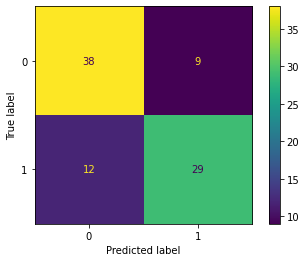

In [120]:
dados = dados_limpos_sem_corr
x_columns = dados.columns
y = dados['ICU']
x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER",'ICU'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
modelo = RandomForestClassifier().fit(x_train, y_train)

plot_confusion_matrix(modelo,x_test, y_test);
plt.plot();

y_pred = modelo.predict(x_test)
print(classification_report(y_test, y_pred))

Acima vemos a matriz de confusão do modelo RandomForest. O interessante dessa visualização é a demonstração não só da precisão de nosso modelo, mas a estratificação dos erros e acertos. 

O total de acertos é a soma de verdadeiros positivos e verdadeiros negativos. O total de erros é a soma de falsos positivos e falsos negativos.

Assim podemos ver se nosso modelo tem tendência maior de acertos para uma classe ou outra. Isso é particularmente preocupante no nosso problema, pois **não adianta acertar muito quem não vai para UTI, se o modelo falha mais em prever quem precisará de cuidados maiores. Na média a precisão geral do modelo seria maior que sua precisão para casos de necessidade de internação.**

Para auxiliar a análise da distribuição de erros e acertos por classes imprimimos o `classification_report` acima da matriz de confusão.
Deste relatório destacamos 3 métricas:
- **Precision** -> Usado quando é importante saber quantas indicações como 1 ou 0 o modelo acertou dentro destas indicações, ou seja, o denominador é a soma das previsões pelo modelo para uma label.
- **Recall** -> Usado quando é importante saber quantos valores reais a previsão errou. Ou seja, o denominador é a soma das ocorrências reais de uma determinada label.
- **No nosso caso o recall é importante para vermos quantos dos casos que de fato terminaram na UTI o nosso modelo acertou, ou seja, `1 - recall[1]` mostra quantos casos de UTI nosso modelo deixou passar.**
- **F1_score** -> Média harmônica entre precision e recall. Portanto uma métrica mais generalista dentro deste relatório.

> $Mh = n/(1/X1+1/X2+...+1/Xn)$

Por ser preocupante não prever pacientes que precisem ir para UTI, focaremos no `recall` e no `f1_score` por ser uma boa generalização entre `recall` e `precision`, já que não se deve abrir mão também do precision.

In [121]:
def gera_n_f1_recall(modelo, dados, n):
  x_columns = dados.columns
  y = dados['ICU']
  x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER",'ICU'], axis=1)

  f1_lista = []
  recall_lista = []
  for _ in range(n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    f1_lista.append(f1)
    recall_lista.append(recall)
  
  f1_medio = np.mean(f1_lista)
  recall_medio = np.mean(recall_lista)

  nome_modelo = type(modelo).__name__
  print(f'--------------\nModelo {nome_modelo}')
  print(f"F1_score médio | recall médio")
  print(f"{f1_medio} | {recall_medio} ")

In [122]:
gera_n_f1_recall(RandomForestClassifier(),dados_limpos_sem_corr,100)
gera_n_f1_recall(xgb.XGBClassifier(),dados_limpos_sem_corr,100)

--------------
Modelo RandomForestClassifier
F1_score médio | recall médio
0.7007357986923363 | 0.6831707317073171 
--------------
Modelo XGBClassifier
F1_score médio | recall médio
0.6882089744075821 | 0.6768292682926829 


Após os testes, os resultados do modelo Random Forest continuam bem próximos do modelo Gradient Boosting. As diferenças não passam de 1% nas métricas selecionadas.

Vamos seguir para a próxima etapa onde tentaremos refinar cada um dos modelos a ponto de extrair mais performance e vermos se algum dos modelos se destaca.

#Tuning e Validação Cruzada
##Validação Cruzada
---
No processo de preparação de um modelo de Machine Learning a separação em dados de treino e teste é necessária para expormos o modelo treinado a dados desconhecidos e avaliar sua performance então.

A validação cruzada, do inglês cross validation, é um processo utilizado para asegurar que os testes no modelo foram realizados de forma bem distribuída em doto conjunto de dados. Ela pode ser realizada de diversas formas, mas uma abordagem típica é a separação do dataset em n blocos distintos. O processo de treino e validação ocorrerá n vezes. A cada iteração um dos blocos será separado, o restante será utilizado para treino e aquele bloco destacado será utilizado como conjunto de dados para validação do resultado após treino.

|![cross_validation.png](https://github.com/josevabo/covid19_previsao_UTI_sirio_libanes/blob/main/images/cross_validation.png?raw=true)|
|:--:|
|Processo de validação cruzada ou cross validation com separação em 5 partes. <b><i>Fonte: towardsdatascience.com</i></b>|

Este processo garante um resultado mais uniforme dos dados, pois a validação cruzada se assemelha a um processo de teste, mas iterativamente permitindo uma maior uniformização dos testes ao longo do dataset.

##Tuning do modelo
---

Todo modelo de machine learning possui parâmetros que ao serem alterados alteram a forma como o algoritmo abordará os dados durante o treino, por consequência alterando seu resultado. Estes são chamados de **hiperparâmetros**. 

O ajuste de hiperparâmetros, também chamado de **Tuning**, permite extrair o máximo de cada modelo e deve ser usado com cautela de acordo com o problema ao qual está sendo aplicado o machine learning.

Combinar a validação cruzada com o Tuning do modelo em diversas iterações é possível. Isso nos permite testar o desempenho do modelo em diversas configurações de hiperparâmetros possíveis e com uma maior confiabilidade no resultado devido à validação cruzada.


##Tuning do modelo Random Forest
Para realizar o ajuste de um modelo é necessário conhecer quais parâmetros podem ser alterados. O modelo RandomForest possui diversos parâmetros, listados abaixo (com os valores definidos por padrão):
```
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
 ```

 A partir desta lista e estudando a documentação oficial do modelo vamos definir quais parâmetros ajustar de acordo com a relevância. A abordagem inicial aqui será de explorar o máximo de hiperparâmetros possíveis para escolher os que se mostram mais relevantes e explorá-los mais detalhadamente.



###Utilizando o RandomSearchCV
Com o RandomSearchCV podemos testar em diversas iterações combinações aleatórias de valores de hiperparâmetros dentro de intervalos definidos pelo usuário.

Isto funciona como um teste em massa distribuído em diversas combinações para ao final obtermos uma relação da melhor combinação de valores dentro do intervalo dos hiperparâmetros obtida dentro dos testes randômicos.
Com isso podemos passar para um teste iterativo explorando variações de valores concentrados ao redor dos valores indicados.

Abaixo, após analisar a documentação do Random Forest, escolhi 7 hiperparâmetros, com intervalos diferentes que juntos totalizam mais de 30.000 combinações possíveis.

O algoritmo de Random Search realizará 3 treinos para cada uma das 100 combinações que ele escolherá aleatoriamente dentro dos intervalos definidos, totalizando 300 treinos. Ao final ele informará a melhor combinação dos hiperparâmetros explorados.

In [124]:
#dados
dados = dados_limpos_sem_corr
x_columns = dados.columns
y = dados["ICU"]
x = dados[x_columns].drop(["PATIENT_VISIT_IDENTIFIER","ICU"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,test_size=.2)

In [ ]:
# #Seleção dos intervalos de hiperparametros
# hiperparams = {'bootstrap': [True, False],
#  'max_depth': [None]+[int(depth) for depth in np.linspace(10,210,20)],
#  'max_features': ['auto', 'sqrt'],
#  'max_samples': [None] + [max for max in np.arange(0.2,1.0,0.2)],
#  'min_samples_leaf': [1,2,3,4,5],
#  'min_samples_split': [2,5,10,15,20],
#  'n_estimators': [int(n) for n in np.linspace(100,3000,300)],
# }

# modelo_rd_forest = RandomForestClassifier()
# #Random Search
# rd_forest_random = RandomizedSearchCV(modelo_rd_forest, param_distributions = hiperparams, n_iter = 100, cv = 3, random_state=37, verbose = 1)
# rd_forest_random.fit(x_train,y_train)
# rd_forest_random.best_params_

Devido ao longo tempo necessário para realizar os diversos treinos e validações cruzadas nos processos de exploração de valores para hiperparâmetros, vou colocar o código aqui e evidenciar os resultados obtidos durante a produção deste notebook logo abaixo.
```
#Seleção dos intervalos de hiperparametros
hiperparams = {'bootstrap': [True, False],
 'max_depth': [None]+[int(depth) for depth in np.linspace(10,210,20)],
 'max_features': ['auto', 'sqrt'],
 'max_samples': [None] + [max for max in np.arange(0.2,1.0,0.2)],
 'min_samples_leaf': [1,2,3,4,5],
 'min_samples_split': [2,5,10,15,20],
 'n_estimators': [int(n) for n in np.linspace(100,3000,300)],
}

modelo_rd_forest = RandomForestClassifier()
#Random Search
rd_forest_random = RandomizedSearchCV(modelo_rd_forest, param_distributions = hiperparams, n_iter = 100, cv = 3, random_state=37, verbose = 1)
rd_forest_random.fit(x_train,y_train)
rd_forest_random.best_params_```



Com os resultados de melhores parâmetros abaixo, vamos explorar seus arredores.
```
{
 'bootstrap': False,
 'max_depth': 20,
 'max_features': 'auto',
 'max_samples': 0.2,
 'min_samples_leaf': 2,
 'min_samples_split': 20,
 'n_estimators': 2437
 }
```

Com o GridSearchCV exploraremos por completo os intervalos definidos de hiperparâmetros, ou seja, o número de iterações será a soma de todas as combinações possíveis entre os parâmetros indicados.



In [ ]:
# #gridSearch
# hiperparams_grid = {
#  'bootstrap': [False],
#  'max_depth': [20, 50, 160],
#  'max_features': ['auto'],
#  'max_samples': [0.2, None],
#  'min_samples_leaf': [2,4],
#  'min_samples_split': [10,20],
#  'n_estimators': [2000,3000],
# }

# rd_forest_grid = RandomForestClassifier()
# grid_search = GridSearchCV(rd_forest_grid, param_grid = hiperparams_grid, cv = 3, verbose = 1)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

Abaixo segue código executado para o GridSearchCV:


```
#gridSearch
hiperparams_grid = {
 'bootstrap': [False],
 'max_depth': [20, 50, 160],
 'max_features': ['auto'],
 'max_samples': [0.2, None],
 'min_samples_leaf': [2,4],
 'min_samples_split': [10,20],
 'n_estimators': [2000,3000],
}

rd_forest_grid = RandomForestClassifier()
grid_search = GridSearchCV(rd_forest_grid, param_grid = hiperparams_grid, cv = 3, verbose = 1)
grid_search.fit(x_train, y_train)
grid_search.best_params_```



Melhores parâmetros no GridSearch:
```
{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'max_samples': 0.2,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 3000}
```
 Abaixo checamos o resultado do melhor estimador no GridSearch:

In [132]:
best_params = {'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'max_samples': 0.2,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 3000}

melhor_rd_forest = RandomForestClassifier(**best_params)
gera_n_scores(melhor_rd_forest,dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo RandomForestClassifier: 0.73


In [133]:
modelo_rd = RandomForestClassifier()
gera_n_scores(modelo_rd,dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo RandomForestClassifier: 0.7331818181818183


**Apesar do uso do tuning, o resultado de acurácia do melhor estimador do GridSearch em geral ficou pouco abaixo abaixo do resultado do modelo com suas configurações padrão.

**Em testes obtivemos 73% de acurácia para o modelo que recebeu parâmetros personalizados e 73.31% para o modelo com parâmetros padrão.**

Um resultado contraditório que mostra que **devemos ter atenção com as indicações automáticas dos métodos de exploração automatizada de hiperparâmetros como RandomizedSearchCV e GridSearchCV.**

Vamos passar para o próximo modelo e ver como seu resultado se sai com a ajuda destes métodos.

##Tuning do modelo XGBoosting
---
Agora vamos replicar o processo para tentar encontrar melhores ajustes para o nosso modelo XGBoosting usando os métodos de exploração de hiperparâmetros e validação cruzada dos modelos.

In [ ]:
# #Seleção dos intervalos de hiperparametros
# hiperparams = {
#     'n_estimators': [int(n) for n in np.linspace(100,1500,300)],
#     'eta': [sub for sub in np.arange(0.1,0.6,0.2)],
#     'subsample': [sub for sub in np.arange(0.4,1.0,0.3)],
#     'max_depth': [3, 4, 5, 6, 8, 10],
#     'min_child_weight': [1, 2, 3, 4]
# }

# modelo_xgb = xgb.XGBClassifier()
# #Random Search
# xgb_random = RandomizedSearchCV(modelo_xgb, param_distributions = hiperparams, n_iter = 100, cv = 3, random_state=37, verbose = 1)
# xgb_random.fit(x_train,y_train)
# xgb_random.best_params_

In [134]:
best_params = {'eta': 0.1,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 483,
 'subsample': 0.7}

melhor_xgb = xgb.XGBClassifier(**best_params)
gera_n_scores(melhor_xgb,dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo XGBClassifier: 0.7136363636363636


Os hiperparâmetros do melhor estimador encontrado pelo RandomizedSearchCV em nosso teste segue abaixo:
```
{'eta': 0.1,
 'max_depth': 3,
 'min_child_weight': 4,
 'n_estimators': 483,
 'subsample': 0.7}
 ```
Com ele obtivemos resultado de 74.64% em teste inicialmente.

Vamos explorar estas indicações com o GridSearchCV.

As configurações padrão destes hiperparâmetros seguem abaixo:

```
{
 'learning_rate': 0.1, #mesmo que 'eta'
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1,
 }
```

Vamos explorar intervalos entre os valores padrão do modelo e os indicados como melhor resultado dentro do RandomizedSearchCV.

 

```
hiperparams_grid = {
 'min_child_weight': [1,3,4],
 'n_estimators': [100,400,600],
 'subsample': [0.7,1]}

xgb_grid = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_grid, param_grid = hiperparams_grid, cv = 3, verbose = 1)
grid_search.fit(x_train, y_train)
grid_search.best_params_
```



In [135]:
# hiperparams_grid = {
#  'min_child_weight': [1,3,4],
#  'n_estimators': [100,400,600],
#  'subsample': [0.7,1]}

# xgb_grid = xgb.XGBClassifier()
# grid_search = GridSearchCV(xgb_grid, param_grid = hiperparams_grid, cv = 3, verbose = 1)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:   13.0s finished


{'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.7}

O GridSearchCV retornou os melhores ajustes de hiperparâmetros abaixo:

`{'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.7}`


In [136]:
best_params = {'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.7}

melhor_xgb_grid = xgb.XGBClassifier(**best_params)
gera_n_scores(melhor_xgb_grid,dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo XGBClassifier: 0.7231818181818183


In [137]:
modelo_xgb = xgb.XGBClassifier()
gera_n_scores(modelo_xgb,dados_limpos_sem_corr,50)

Acurácia média em 50 treinos do modelo XGBClassifier: 0.7220454545454545


Novamente não vemos uma melhoria de performance significativa ao realizar busca de outros valores para hiperparâmetros. 

**O modelo default neste último teste obteve acurácia inferior em apenas 0.1% comparado ao modelo com hiperparâmetros ajustados com RandomizedSearchCV e GridSearchCV.**

Resultados obtidos em teste:

| <h3>Modelo  | <h3>Score médio |
|:--|:--|
|Random Forest Default|<b>0.7331|
|Random Forest ajustado|<b>0.7300|
|XGBoost default| <b>0.7220|
|XGBoost ajustado| <b>0.7231|

##Testando resultados de AUC
---
Vamos avaliar os dois tipos de modelos, ajustados e não ajustados, através de outra métrica, o AUC.

In [146]:
gera_auc_medio(modelo_rd, dados_limpos_sem_corr,50)
gera_auc_medio(melhor_rd_forest, dados_limpos_sem_corr,50)
gera_auc_medio(modelo_xgb, dados_limpos_sem_corr,50)
gera_auc_medio(melhor_xgb_grid, dados_limpos_sem_corr,50)

--------------
Modelo RandomForestClassifier
AUC médio 0.7971198754540738
--------------
Modelo RandomForestClassifier
AUC médio 0.799844317592112
--------------
Modelo XGBClassifier
AUC médio 0.7881473793461338
--------------
Modelo XGBClassifier
AUC médio 0.7929839128178515


Executando o código abaixo:
```
gera_auc_medio(modelo_rd, dados_limpos_sem_corr,50)
gera_auc_medio(melhor_rd_forest, dados_limpos_sem_corr,50)
gera_auc_medio(modelo_xgb, dados_limpos_sem_corr,50)
gera_auc_medio(melhor_xgb_grid, dados_limpos_sem_corr,50)
```

Obtemos os resultados de AUC:
```
Modelo RandomForestClassifier
AUC médio 0.7971198754540738
--------------
Modelo RandomForestClassifier
AUC médio 0.799844317592112
--------------
Modelo XGBClassifier
AUC médio 0.7881473793461338
--------------
Modelo XGBClassifier
AUC médio 0.7929839128178515
```

Ordenando os resultados de AUC médio por modelo, temos:

| <h3>Modelo  | <h3>AUC médio |
|:--|:--|
|Random Forest ajustado|<b>0.7998|
|Random Forest Default|<b>0.7971|
|XGBoost ajustado| <b>0.7929|
|XGBoost default| <b>0.7881|

Na análise do AUC, os modelos ajustados tiveram ganhos sobre os modelos padrão, mas um aumento de performance bem pequeno. Isto pode ser resultado também da falta de mais dados, pois estamos utilizando um dataset para treino e teste que no total tem menos de 400 registros, e por volta de 100 features. Mais registros ajudariam o modelo a se tornar mais geral para os diversos cenários de teste.

#Feature importance
---
Dados os resultados acima, vamos observar o feature importance nos modelos XGBoost e Random Forest para entendermos quais features foram consideradas mais relevantes para cada modelo.

Este é um recurso que nos ajuda a entender um pouco como cada modelo utilizou dos dados de treino.

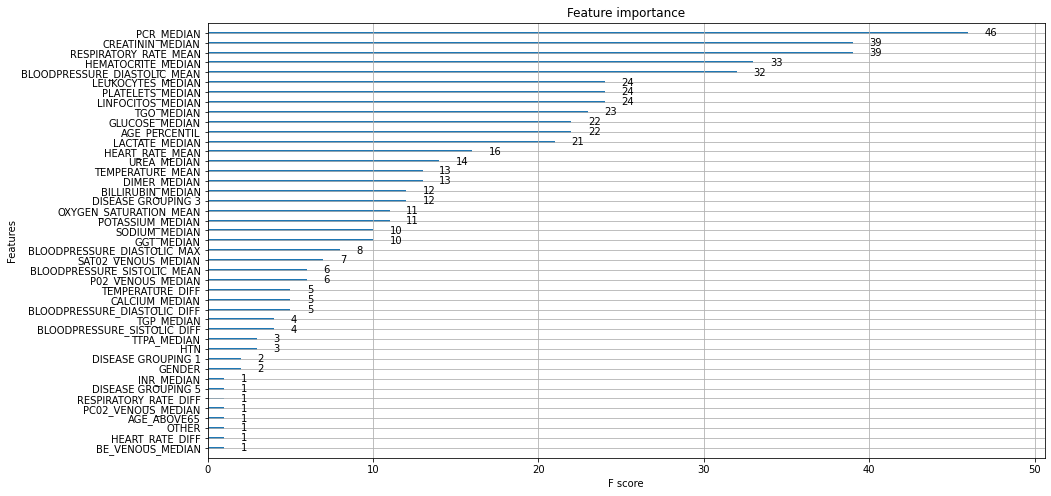

In [138]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
xgb.plot_importance(modelo_xgb, ax=ax)

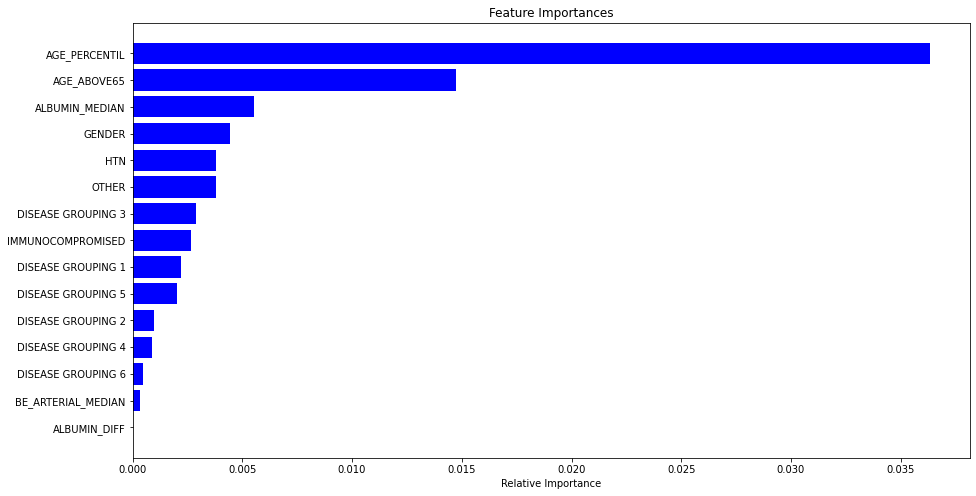

In [145]:
features = dados_limpos_sem_corr.drop(['PATIENT_VISIT_IDENTIFIER','ICU'], axis=1).columns
importances = modelo_rd.feature_importances_
indices = np.argsort(importances[:15])
fig, ax = plt.subplots(1,1, figsize=(15,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Percebemos que os dois modelos definiram features mais relevantes distintas, no XGBoost a feature mais relevante foi a PCR_MEDIAN, mas no Random Forest foi a AGE_PERCENTIL. Isto acontece em razão de cada modelo abordar o problema de classificação de forma diferente. E é um fator que também leva à diferença em resultados de testes.

#Conclusões
---
- Durante a análise exploratória dos dados pudemos perceber que alguns fatores considerados de risco amplamente divulgados são verdadeiros em nosso conjunto de dados.
  - Doenças pré-existentes identificadas nos pacientes apresentaram alta correlação com casos de internação. Em especial a hipertensão.
  - Um dos fatores mais relevantes para internação é a faixa etária do paciente. A taxa de internação entre pacientes já idosos foi aproximadamente o dobro da taxa para os mais jovens.
  - Taxas fisiológicas obtidas através de exames de sangue e alguns sinais vitais também se demonstraram importantes aliados na tomada da decisão para internação ou não dos pacientes. Isto nos lembra da importância de realizar um diagnóstico mais completo logo nas primeiras horas de atenção ao paciente.

- Após realização de testes com várias métricas, encontramos como melhores modelos os  RandomForestClassifier e XGBClassifier. 

- Ambos tiveram resultados próximos, mas se necessário escolher apenas um, nos testes finais o modelo RandomForest se manteve décimos de percento à frente.

- Realizado o processo de ajuste de hiperparâmetros, testamos modelos considerados ótimos em seus ajustes antes do treino. Os resultados obtidos foram pouco efetivos, em alguns momento perdendo performance quando comparados aos modelos sem ajustes.

- Abaixo segue resumo dos resultados finais:

| Modelo  | Score médio| AUC médio |
|:--|:--|:--|
|Random Forest ajustado|<b>0.7300</b>|<b>0.7998</b>|
|Random Forest Default|<b>0.7331</b>|<b>0.7971</b>|
|XGBoost ajustado| <b>0.7231</b>|<b>0.7929</b>|
|XGBoost default| <b>0.7220</b>|<b>0.7881</b>|

- Nestes resultados o modelo mais consistente foi o RandomForest ajustado. Porém, os resultados obtidos para a natureza crítica do problema ainda não são satisfatórios. 

- Apesar das performances abaixo dos 80%, os resultados obtidos mostram um bom caminho em direção ao objetivo, pois a quantidade de registros no dataset é fator fundamental para um modelo bem treinado e capaz de gneralizar seu aprendizado para lidar com os diversos cenários possíveis em produção. Portando, com um aumento na base de dados, seja pela disponibilização pela própria equipe do hospital ou pelo aumento do conjunto de dados de outra forma, o modelo tende a ficar cada vez mais robusto e generalista. Em um cenário como este é possível que o processo de tuning dos hiperparâmetros possa apresentar resultados mais efetivos.


- Uma sugestão para evolução deste projeto é o ajuste mais fino de hiperparâmetros em busca de melhor acurácia do modelo.

# Referências
---
Seguem abaixo algumas páginas que deram suporte ao material produzido neste projeto:

https://www.kaggle.com/S%C3%ADrio-Libanes/covid19

https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o

https://www.tuasaude.com/proteina-c-reativa/

https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/

https://pt.wikipedia.org/wiki/Gradient_boosting

https://pt.wikipedia.org/wiki/Caracter%C3%ADstica_de_Opera%C3%A7%C3%A3o_do_Receptor

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74